In [1]:
import pandas as pd


#read_csv():  csv 파일 읽기
CCTV_Seoul = pd.read_csv('서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv', skiprows=[0,2], encoding='CP949', thousands=',')
CCTV_Seoul.head()  #head(): 자료의 앞 부분만 검토하는 용도

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32


In [2]:
CCTV_Seoul.columns   # 열 정보 확인하면 Index(리스트) 형태임

Index(['구분', '총계', '2012년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년'],
      dtype='object')

In [3]:
CCTV_Seoul.columns[0]   # 0번 열 확인

'구분'

In [4]:
# 열 이름 변경
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: '자치구'}, inplace=True)  # inplace 옵션으로 원본을 직접 수정
CCTV_Seoul.head()

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32


In [5]:
# read_excel(): xls 파일 읽기
pop_Seoul = pd.read_excel('서울시주민등록인구통계_2020.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
3,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
4,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2,23794


In [6]:
# 선두 2행은 중복된 헤더로서 필요 없음 
# B(자치구), D(전체 인구), G(한국인 수), J(외국인 수), N(고령자 수) 열만 필요함
# 옵션 변경하여 다시 읽기
pop_Seoul = pd.read_excel ('서울시주민등록인구통계_2020.xls',
                           header = 2,                  # (0부터 시작하는 번호로)2번 행을 헤더로 지정, 앞의 행은 무시
                           usecols = 'B, D, G, J, N')   # 지정 열만 읽어들이도록 제한
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [7]:
# 열 이름 변경
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '자치구',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,자치구,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [8]:
CCTV_Seoul.shape

(25, 13)

In [9]:
CCTV_Seoul.dtypes

자치구         object
총계           int64
2012년 이전     int64
2012년        int64
2013년        int64
2014년        int64
2015년        int64
2016년        int64
2017년        int64
2018년        int64
2019년        int64
2020년        int64
2021년        int64
dtype: object

In [10]:
CCTV_Seoul.describe()

,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
count,25.0000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,3081.2800,306.680000,88.000000,139.640000,177.560000,263.280000,325.160000,397.880000,395.040000,478.44000,445.280000,64.320000
std,1063.2148,393.645115,71.336643,89.694797,153.166326,181.918599,260.103934,275.090337,208.503493,315.55072,258.230601,89.966531
min,1629.0000,0.000000,0.000000,0.000000,29.000000,79.000000,1.000000,6.000000,85.000000,9.00000,168.000000,0.000000
25%,2415.0000,35.000000,24.000000,77.000000,77.000000,141.000000,168.000000,196.000000,222.000000,274.00000,288.000000,3.000000
50%,2588.0000,83.000000,77.000000,106.000000,123.000000,209.000000,248.000000,351.000000,386.000000,358.00000,386.000000,32.000000
75%,3704.0000,448.000000,129.000000,193.000000,210.000000,329.000000,350.000000,506.000000,540.000000,712.00000,508.000000,101.000000
max,6502.0000,1413.000000,253.000000,349.000000,597.000000,840.000000,1310.000000,1060.000000,867.000000,1068.00000,1213.000000,331.000000


In [11]:
CCTV_Seoul.sample(3)

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
20,관악구,4942,428,205,291,513,529,621,687,663,640,331,34
16,구로구,4075,852,216,349,187,268,326,540,488,434,415,0


In [12]:
# 총계 하위 5개 구
CCTV_Seoul.sort_values(by='총계', ascending=True).head(5)  # 'by=' 생략 가능

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
9,도봉구,1629,39,22,96,181,79,159,134,222,198,168,331
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
19,동작구,2297,41,24,25,503,128,253,271,300,322,419,11
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
17,금천구,2374,0,0,178,80,361,133,196,540,369,508,9


In [13]:
# 총계 상위 5개 구
CCTV_Seoul.sort_values('총계', ascending=False).head(5)

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
22,강남구,6502,124,77,75,597,840,1310,999,748,789,942,1
20,관악구,4942,428,205,291,513,529,621,687,663,640,331,34
16,구로구,4075,852,216,349,187,268,326,540,488,434,415,0
7,성북구,3958,83,78,170,230,323,594,460,867,714,251,188
11,은평구,3791,14,3,44,332,329,555,403,635,1057,288,131


In [14]:
# 최근 3개년도 증가율 계산 및 열 삽입
분자 = ((CCTV_Seoul['2021년']) + CCTV_Seoul['2020년'] + CCTV_Seoul['2019년'])
분모 = (CCTV_Seoul['2012년 이전'] + CCTV_Seoul['2013년'] + CCTV_Seoul['2014년']
      + CCTV_Seoul['2015년'] + CCTV_Seoul['2016년'] + CCTV_Seoul['2017년'] + CCTV_Seoul['2018년'])
CCTV_Seoul['최근증가율'] = 분자 / 분모 * 100
CCTV_Seoul.head()

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43,16.578947
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289,56.930693
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0,66.570605
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76,29.835698
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32,57.009926


In [15]:
# 최근 3개년도 증가율 상위 10개 구
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(10)

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
8,강북구,2462,0,0,24,65,105,243,6,392,1000,588,39,194.850299
6,중랑구,3296,302,24,253,88,141,161,162,173,1049,939,4,155.625000
23,송파구,2854,72,61,86,85,215,148,241,542,1068,235,101,101.079914
9,도봉구,1629,39,22,96,181,79,159,134,222,198,168,331,76.593407
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0,66.570605
11,은평구,3791,14,3,44,332,329,555,403,635,1057,288,131,63.840830
15,강서구,2560,55,129,106,213,188,168,506,259,457,356,123,62.608696
24,강동구,2547,332,27,163,49,154,202,273,377,356,614,0,62.580645
17,금천구,2374,0,0,178,80,361,133,196,540,369,508,9,59.543011
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32,57.009926


In [16]:
# 최근 3개년도 증가율 하위 10개 구
CCTV_Seoul.sort_values(by='최근증가율', ascending=True).head(10)

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43,16.578947
14,양천구,3312,1413,167,181,143,180,350,139,140,274,325,0,23.527101
5,동대문구,2497,1090,146,60,29,111,233,136,197,209,223,63,26.670259
20,관악구,4942,428,205,291,513,529,621,687,663,640,331,34,26.929260
21,서초구,3704,116,75,94,71,563,516,1060,428,358,420,3,27.422753
16,구로구,4075,852,216,349,187,268,326,540,488,434,415,0,28.205980
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76,29.835698
22,강남구,6502,124,77,75,597,840,1310,999,748,789,942,1,36.906030
12,서대문구,2940,730,253,155,108,137,223,356,237,343,397,1,38.078109
7,성북구,3958,83,78,170,230,323,594,460,867,714,251,188,42.280895


In [17]:
pop_Seoul.head()

,자치구,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [18]:
pop_Seoul.dtypes

자치구    object
인구수     int64
한국인     int64
외국인     int64
고령자     int64
dtype: object

In [19]:
# 0 번 행 삭제
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,자치구,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [20]:
pop_Seoul.describe()

,인구수,한국인,외국인,고령자
count,25.000000,25.000000,25.000000,25.000000
mean,400551.240000,389346.200000,11205.040000,60729.560000
std,127661.623217,129398.149924,8162.361267,17027.908046
min,136469.000000,126175.000000,2257.000000,23794.000000
25%,325875.000000,312985.000000,4490.000000,53038.000000
50%,404766.000000,395014.000000,10294.000000,61660.000000
75%,460532.000000,456339.000000,15573.000000,72172.000000
max,680883.000000,674095.000000,32863.000000,89539.000000


In [22]:
# 자치구 열 값을 중복없이 출력
n = pop_Seoul['자치구'].nunique()
print(f'자치구 개수: {n} 개 (NaN은 값을 카운트할 때 제외됨)')
pop_Seoul['자치구'].unique()  # NaN 값이 존재하는지 확인하기

자치구 개수: 25 개 (NaN은 값을 카운트할 때 제외됨)


array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [23]:
pop_Seoul.sample(3)  # '인구수'는 총 인구 수

,자치구,인구수,한국인,외국인,고령자
11,노원구,535495,531037,4458,82682
4,성동구,307193,299042,8151,44728
8,성북구,454532,442494,12038,72172


In [24]:
# '외국인비율' 및 '고령자비율' 열 계산 및 추가
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.sample(3)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
18,금천구,251370,232583,18787,38508,7.473843,15.319251
6,동대문구,362793,346156,16637,60367,4.585811,16.639516
24,송파구,680883,674095,6788,89539,0.996941,13.150424


In [25]:
# '인구수' 열 상위 5개 구 확인
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [26]:
# '외국인' 열 상위 5개 구 확인
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


In [27]:
# '고령자' 열 상위 5개 구 확인
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [28]:
CCTV_Seoul.head() # CCTV 데이터 

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43,16.578947
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289,56.930693
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0,66.570605
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76,29.835698
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32,57.009926


In [29]:
pop_Seoul.head() # 인구 데이터

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [30]:
# '자치구' 열을 key 열로 활용하여 merge
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='자치구', how='outer')
data_result.head()

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1772.0,813.0,0.0,0.0,210.0,150.0,1.0,261.0,85.0,9.0,200.0,43.0,16.578947,161984.0,151217.0,10767.0,28073.0,6.646953,17.330724
1,중 구,2333.0,16.0,114.0,87.0,77.0,236.0,240.0,372.0,386.0,155.0,361.0,289.0,56.930693,NaN,NaN,NaN,NaN,NaN,NaN
2,용산구,2383.0,34.0,71.0,234.0,125.0,221.0,298.0,351.0,125.0,307.0,617.0,0.0,66.570605,246165.0,229579.0,16586.0,39439.0,6.737757,16.021368
3,성동구,3602.0,448.0,125.0,212.0,105.0,339.0,310.0,874.0,390.0,262.0,461.0,76.0,29.835698,307193.0,299042.0,8151.0,44728.0,2.653381,14.560228
4,광진구,2588.0,35.0,57.0,100.0,187.0,98.0,52.0,675.0,465.0,712.0,175.0,32.0,57.009926,365990.0,350417.0,15573.0,48989.0,4.255034,13.385338


In [31]:
# NaN 값 포함되어 있는지 검사
data_result.isnull().values.any()

True

In [32]:
# NaN 값 포함된 행 지우기
data_result.dropna(axis=0, inplace=True)
data_result.head()

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1772.0,813.0,0.0,0.0,210.0,150.0,1.0,261.0,85.0,9.0,200.0,43.0,16.578947,161984.0,151217.0,10767.0,28073.0,6.646953,17.330724
2,용산구,2383.0,34.0,71.0,234.0,125.0,221.0,298.0,351.0,125.0,307.0,617.0,0.0,66.570605,246165.0,229579.0,16586.0,39439.0,6.737757,16.021368
3,성동구,3602.0,448.0,125.0,212.0,105.0,339.0,310.0,874.0,390.0,262.0,461.0,76.0,29.835698,307193.0,299042.0,8151.0,44728.0,2.653381,14.560228
4,광진구,2588.0,35.0,57.0,100.0,187.0,98.0,52.0,675.0,465.0,712.0,175.0,32.0,57.009926,365990.0,350417.0,15573.0,48989.0,4.255034,13.385338
5,동대문구,2497.0,1090.0,146.0,60.0,29.0,111.0,233.0,136.0,197.0,209.0,223.0,63.0,26.670259,362793.0,346156.0,16637.0,60367.0,4.585811,16.639516


In [33]:
data_result['자치구'].unique()

array(['종로구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구',
       '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [34]:
#'총계' 및 '최근증가율' 열만 남기고, 연도별 CCTV 데이터 열을 삭제
del data_result['2012년 이전']
del data_result['2012년']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
del data_result['2019년']
del data_result['2020년']
del data_result['2021년']
data_result.head()
# 행 삭제는 drop, 열 삭제는 del

,자치구,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1772.0,16.578947,161984.0,151217.0,10767.0,28073.0,6.646953,17.330724
2,용산구,2383.0,66.570605,246165.0,229579.0,16586.0,39439.0,6.737757,16.021368
3,성동구,3602.0,29.835698,307193.0,299042.0,8151.0,44728.0,2.653381,14.560228
4,광진구,2588.0,57.009926,365990.0,350417.0,15573.0,48989.0,4.255034,13.385338
5,동대문구,2497.0,26.670259,362793.0,346156.0,16637.0,60367.0,4.585811,16.639516


In [35]:
# '자치구' 열을 인덱스로 설정(행 번호 열이 사라짐)
data_result.set_index('자치구', inplace=True)
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
종로구,1772.0,16.578947,161984.0,151217.0,10767.0,28073.0,6.646953,17.330724
용산구,2383.0,66.570605,246165.0,229579.0,16586.0,39439.0,6.737757,16.021368
성동구,3602.0,29.835698,307193.0,299042.0,8151.0,44728.0,2.653381,14.560228
광진구,2588.0,57.009926,365990.0,350417.0,15573.0,48989.0,4.255034,13.385338
동대문구,2497.0,26.670259,362793.0,346156.0,16637.0,60367.0,4.585811,16.639516


In [36]:
# 컬럼 이름 변경하기
data_result.rename(
    columns={data_result.columns[0]: 'CCTV 소계', data_result.columns[1]: 'CCTV 증가율'},
    inplace=True)
data_result.head()

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
종로구,1772.0,16.578947,161984.0,151217.0,10767.0,28073.0,6.646953,17.330724
용산구,2383.0,66.570605,246165.0,229579.0,16586.0,39439.0,6.737757,16.021368
성동구,3602.0,29.835698,307193.0,299042.0,8151.0,44728.0,2.653381,14.560228
광진구,2588.0,57.009926,365990.0,350417.0,15573.0,48989.0,4.255034,13.385338
동대문구,2497.0,26.670259,362793.0,346156.0,16637.0,60367.0,4.585811,16.639516


In [37]:
# 상관관계 해석
# 고령자 비율 대 CCTV 소계는 약한 음의 상관관계
import numpy as np
np.corrcoef(data_result['고령자비율'], data_result['CCTV 소계'])

array([[ 1.        , -0.39573359],
       [-0.39573359,  1.        ]])

In [38]:
# 외국인 비율 대 CCTV 소계는 거의 무관
np.corrcoef(data_result['외국인비율'],data_result['CCTV 소계'])

array([[ 1.       , -0.1055597],
       [-0.1055597,  1.       ]])

In [39]:
# 인구수 대 CCTV 소계는 약한 양의 상관관계
np.corrcoef(data_result['인구수'], data_result['CCTV 소계'])

array([[1.        , 0.44507086],
       [0.44507086, 1.        ]])

In [40]:
# 소계 역순으로 정렬
data_result.sort_values(by='CCTV 소계', ascending=False).head(5)

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,6502.0,36.906030,549898.0,544804.0,5094.0,72602.0,0.926354,13.202812
관악구,4942.0,26.929260,516662.0,499374.0,17288.0,76664.0,3.346095,14.838328
구로구,4075.0,28.205980,438308.0,405837.0,32471.0,67432.0,7.408261,15.384615
성북구,3958.0,42.280895,454532.0,442494.0,12038.0,72172.0,2.648438,15.878310
은평구,3791.0,63.840830,482509.0,478019.0,4490.0,82245.0,0.930553,17.045278


In [41]:
# 인구수 역순으로 정렬
data_result.sort_values(by='인구수', ascending=False).head(5)

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
송파구,2854.0,101.079914,680883.0,674095.0,6788.0,89539.0,0.996941,13.150424
강서구,2560.0,62.608696,595703.0,589302.0,6401.0,85992.0,1.074529,14.435381
강남구,6502.0,36.906030,549898.0,544804.0,5094.0,72602.0,0.926354,13.202812
노원구,2415.0,53.713528,535495.0,531037.0,4458.0,82682.0,0.832501,15.440294
관악구,4942.0,26.929260,516662.0,499374.0,17288.0,76664.0,3.346095,14.838328


In [42]:
data_result.head()  # 정리했던 데이터 확인

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
종로구,1772.0,16.578947,161984.0,151217.0,10767.0,28073.0,6.646953,17.330724
용산구,2383.0,66.570605,246165.0,229579.0,16586.0,39439.0,6.737757,16.021368
성동구,3602.0,29.835698,307193.0,299042.0,8151.0,44728.0,2.653381,14.560228
광진구,2588.0,57.009926,365990.0,350417.0,15573.0,48989.0,4.255034,13.385338
동대문구,2497.0,26.670259,362793.0,346156.0,16637.0,60367.0,4.585811,16.639516


In [43]:
import matplotlib.pyplot as plt
# %mapplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 지정한다는 의미인데, 지워도 별 문제 없음

In [44]:
import platform

# rc(runtime configuration)를 사전 형태로 저장한 rcParams
from matplotlib import font_manager, rc
# '-' 표시를 unicode minus 문자(True)로 할지, 아니면 ASCII hyphen 문자(False)로 할지
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':         # MAC OS X
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':      # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

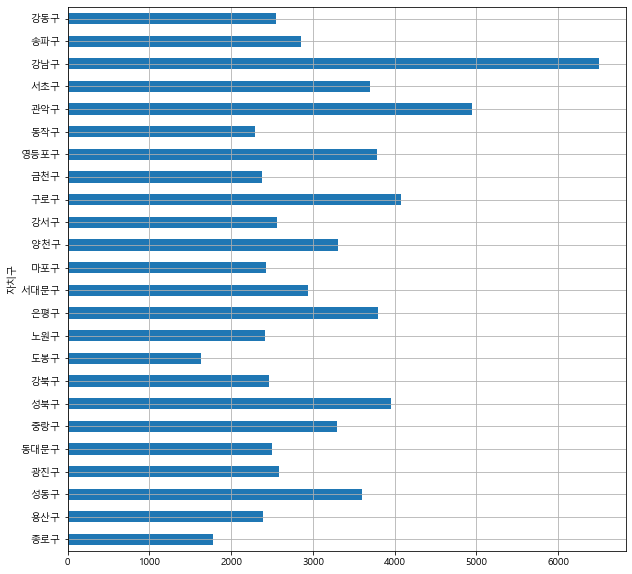

In [45]:
# CCTV 소계 수평 막대 그래프 (not sorted)
plt.figure()

# 정리했던 데이터 뒤에 plot() 함수 차트 작성
# 'barh': 수평 막대, 'bar': 수직 막대
data_result['CCTV 소계'].plot(kind='barh', grid=True, figsize=(10, 10))

plt.show()

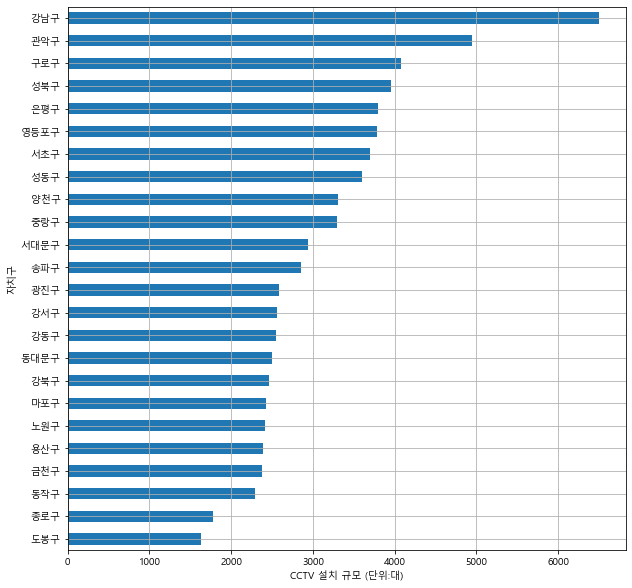

In [46]:
# CCTV 소계 정렬하여 수평 막대 그래프 
data_result['CCTV 소계'].sort_values(ascending=True).plot(kind='barh', grid=True, figsize=(10, 10))
plt.xlabel('CCTV 설치 규모 (단위:대)')
plt.show()

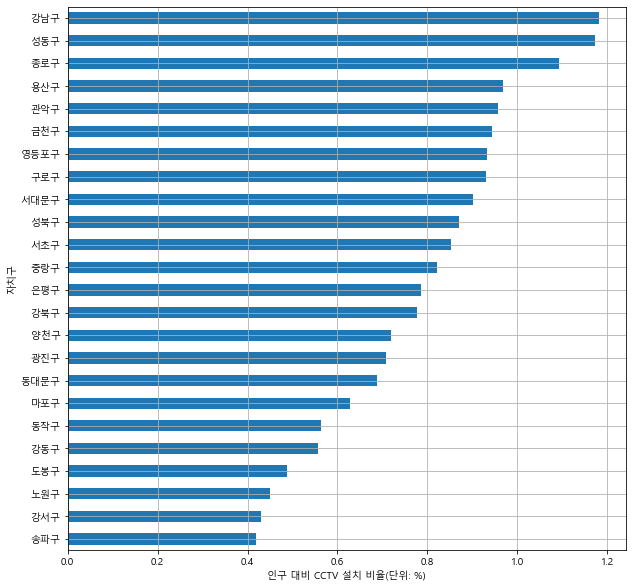

In [47]:
# 인구 대비 CCTV 비율 계산 
data_result['CCTV 비율'] = data_result['CCTV 소계'] / data_result['인구수'] * 100

data_result['CCTV 비율'].sort_values(ascending=True).plot(kind='barh', grid=True, figsize=(10, 10))
plt.xlabel('인구 대비 CCTV 설치 비율(단위: %)')
plt.show()

In [48]:
# 원본 정렬 
data_result.sort_values(by='CCTV 비율', ascending=True, inplace=True)

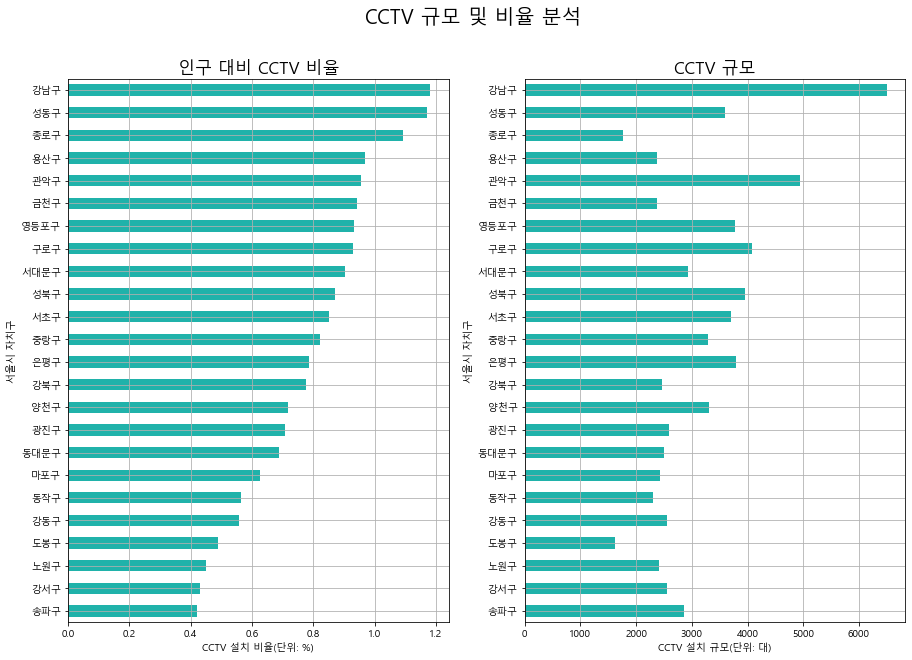

In [49]:
#df.plot()으로 subplot 작성

fig = plt.figure(figsize=(15,10))
fig.suptitle('CCTV 규모 및 비율 분석', fontsize=20)

# 그림 왼쪽에 CCTV 비율 시각화
ax1 = fig.add_subplot(121)
ax1.set_title('인구 대비 CCTV 비율', fontsize=17)
data_result['CCTV 비율'].plot(kind='barh', grid=True, color='lightseagreen')
plt.xlabel('CCTV 설치 비율(단위: %)')
plt.ylabel('서울시 자치구')

# 그림 오른쪽에 CCTV 규모 시각화
ax2 = fig.add_subplot(122)
ax2.set_title('CCTV 규모', fontsize=17)
data_result['CCTV 소계'].plot(kind='barh', grid=True, color='lightseagreen')
plt.xlabel('CCTV 설치 규모(단위: 대)')
plt.ylabel('서울시 자치구')

plt.show()

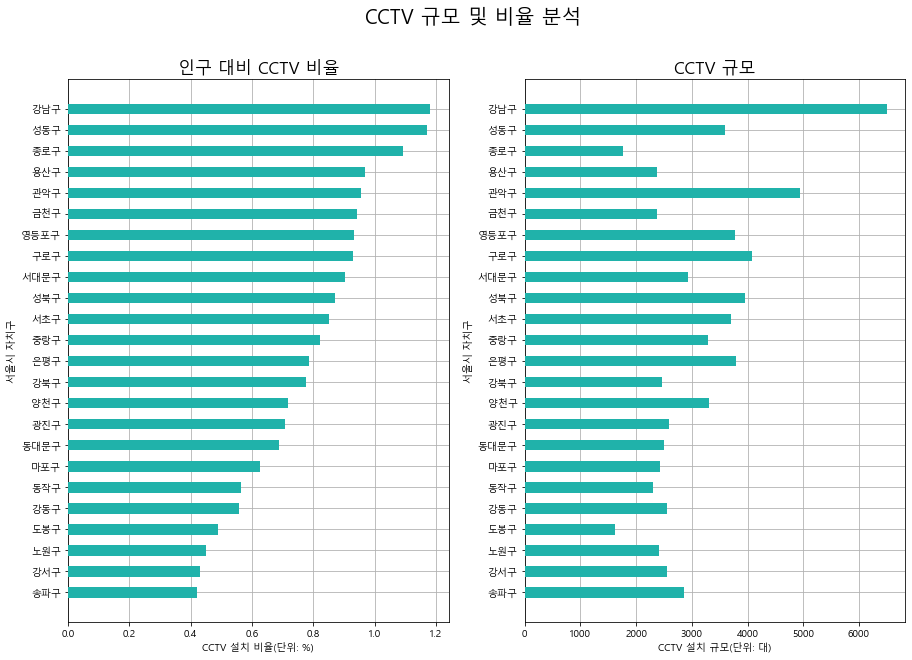

In [50]:
# plt.barh()로 subplot 작성

fig = plt.figure(figsize=(15,10))
fig.suptitle('CCTV 규모 및 비율 분석', fontsize=20)

ax1 = fig.add_subplot(121)
ax1.set_title('인구 대비 CCTV 비율', fontsize=17)
ax1.grid(zorder=0)
plt.barh(y=data_result.index, width=data_result['CCTV 비율'], height=0.5, zorder=3, color='lightseagreen')
plt.xlabel('CCTV 설치 비율(단위: %)')
plt.ylabel('서울시 자치구')

ax2 = fig.add_subplot(122)
ax2.set_title('CCTV 규모', fontsize=17)
ax2.grid(zorder=0)
plt.barh(y=data_result.index, width=data_result['CCTV 소계'], height=0.5, zorder=3, color='lightseagreen')
plt.xlabel('CCTV 설치 규모(단위: 대)')
plt.ylabel('서울시 자치구')

plt.show()

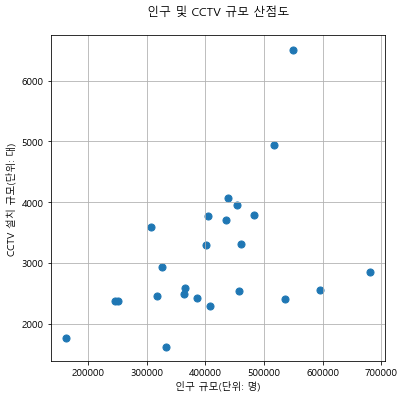

In [51]:
# 인구 대비 CCTV 설치 수량으로 산점도
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],     # x 좌표
            data_result['CCTV 소계'],  # y 좌표
            s=50)                     # 점 크기
plt.title('인구 및 CCTV 규모 산점도\n')
plt.xlabel('인구 규모(단위: 명)')
plt.ylabel('CCTV 설치 규모(단위: 대)')
plt.grid()
plt.show()

In [52]:
# numpy.polyfit(x, y, 차수)
pf = np.polyfit(data_result['인구수'],    # 추정에 사용할 x 좌표 값
                data_result['CCTV 소계'], # 추정에 사용할 y 죄표 값
                1)                        # 1차원(직선 형태) 다항식
pf

array([4.06336288e-03, 1.44016238e+03])

In [53]:
# y 축
fy = np.poly1d(pf)
fy

poly1d([4.06336288e-03, 1.44016238e+03])

In [54]:
# x 축
fx = np.linspace(100000, 700000, 100)
# fx = np.linspace(0, 700000, 100)
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

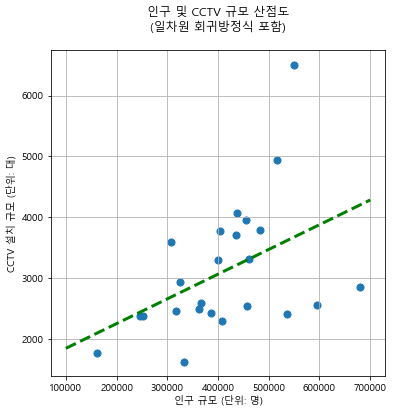

In [55]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['CCTV 소계'], s=50)   # 산점도 플롯(s=size)
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='g')                   # 추정선 플롯
plt.title('인구 및 CCTV 규모 산점도\n(일차원 회귀방정식 포함)\n')
plt.xlabel('인구 규모 (단위: 명)')
plt.ylabel('CCTV 설치 규모 (단위: 대)')
plt.grid()
plt.show()

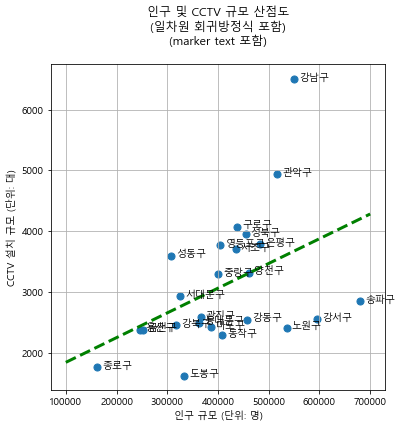

In [56]:
plt.figure(figsize=(6,6))
# 산점도 그리기
plt.scatter(data_result['인구수'], data_result['CCTV 소계'], s=50)  # 산전도 플롯(s=size)
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='g')                   # 추정선 플롯

# 마커 옆에 자치구 이름 출력 
for n in range(len(data_result)):
    plt.text(data_result['인구수'][n] + 10000,
             data_result['CCTV 소계'][n] - 20,
             data_result.index[n],
             fontsize=10)
    
plt.title('인구 및 CCTV 규모 산점도\n(일차원 회귀방정식 포함)\n(marker text 포함)\n')
plt.xlabel('인구 규모 (단위: 명)')
plt.ylabel('CCTV 설치 규모 (단위: 대)')
plt.grid()
plt.show()

In [57]:
# 추정오차 = 절대값(실측치 - 추정치) 계산 및 열 삽입 
data_result['오차'] = np.abs(data_result['CCTV 소계'] - fy(data_result['인구수']))

# 추정오차 역순으로 정렬하여 df_sort로 저장
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,CCTV 소계,CCTV 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 비율,오차
자치구,,,,,,,,,,
강남구,6502.0,36.906030,549898.0,544804.0,5094.0,72602.0,0.926354,13.202812,1.182401,2827.402501
관악구,4942.0,26.929260,516662.0,499374.0,17288.0,76664.0,3.346095,14.838328,0.956525,1402.452429
송파구,2854.0,101.079914,680883.0,674095.0,6788.0,89539.0,0.996941,13.150424,0.419162,1352.837087
강서구,2560.0,62.608696,595703.0,589302.0,6401.0,85992.0,1.074529,14.435381,0.429744,1300.719836
노원구,2415.0,53.713528,535495.0,531037.0,4458.0,82682.0,0.832501,15.440294,0.450985,1201.072884


In [58]:
df_sort.to_csv('CCTV_result.csv', mode='w')

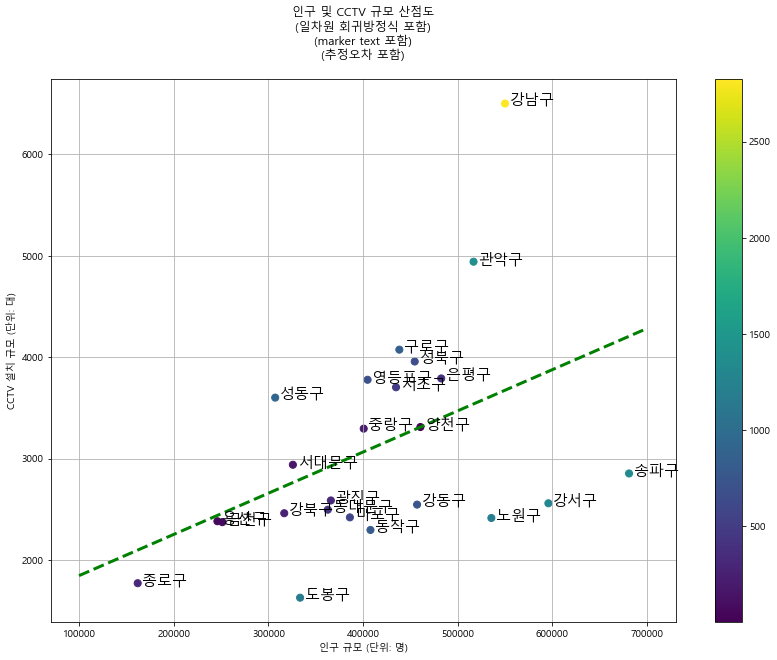

In [59]:
plt.figure(figsize=(14,10))

# 산점도 그리기
plt.scatter(df_sort['인구수'],    # x
            df_sort['CCTV 소계'], # y
            c=df_sort['오차'],    # 마커 색상
            s=50)                 # 마커 크기

# 추세선 그리기
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='g')

# 마커 옆에 구 이름 출력
for n in range(len(df_sort)):  #df_sort 행 개수만큼 반복
    plt.text(df_sort['인구수'][n] + 5000,  # 텍스트 위치 x (마커 위치 x보다 약간 오른쪽)
             df_sort['CCTV 소계'][n] - 20,  # 텍스트 위치 y (마커 위치 y보다 약간 아래쪽)
             df_sort.index[n],              # 텍스트 내용 (구 이름)
             fontsize=15)                   # 폰트 크기
    
plt.colorbar() # 색상 조견 막대 (수직 방향이 기본값)

plt.title('인구 및 CCTV 규모 산점도\n(일차원 회귀방정식 포함)\n(marker text 포함)\n(추정오차 포함)\n')
plt.xlabel('인구 규모 (단위: 명)')
plt.ylabel('CCTV 설치 규모 (단위: 대)')
plt.grid()
plt.show()